In [1]:
import tensorflow as tf
tf.keras.backend.set_floatx('float32')
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras import backend as K

from MD_AE_model import *

import h5py
import numpy as np
import matplotlib.pyplot as plt

In [10]:
## import data
folder = 'C:/Users/tracy/OneDrive - Imperial College London/PhD/Code_md-ae/Hierarchical_2_1__2022_03_27__12_06_23/'
filename = folder + 'results.h5'
hf = h5py.File(filename,'r')
u_test = np.array(hf.get('u_test'))
hist_train = np.array(hf.get('hist_train'))
u_mean = np.array(hf.get('u_avg'))
hf.close()

In [5]:
## load model
filename = folder + 'subnet1'
subnet1 = tf.keras.models.load_model(filename)
filename = folder + 'subnet2'
subnet2 = tf.keras.models.load_model(filename)

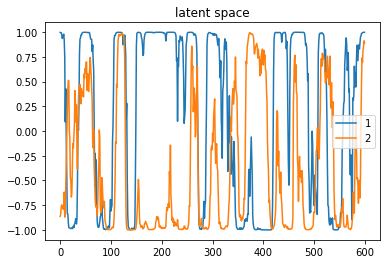

In [9]:
## latent space
z1 = subnet1.encoder.predict(u_test)
z2 = subnet2.encoder.predict(u_test)
plt.figure()
plt.plot(z1,label='1')
plt.plot(z2,label='2')
plt.legend()
plt.title('latent space')
plt.show()

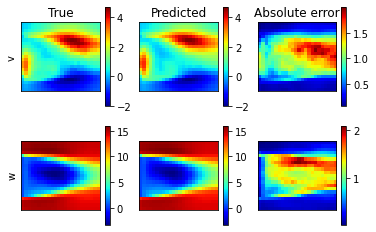

In [12]:
# autoencoder results
y_test = subnet2.predict([u_test,z1])
u_test = u_test + u_mean
y_test = y_test + u_mean
y_mean = np.mean(y_test,0)
u_mean = np.mean(u_test,0)
e = np.abs(y_test-u_test)
e_mean = np.mean(e,0)

umin = min(np.amin(u_mean[:,:,0]),np.amin(y_mean[:,:,0]))
umax = max(np.amax(u_mean[:,:,0]),np.amax(y_mean[:,:,0]))

vmin = min(np.amin(u_mean[:,:,1]),np.amin(y_mean[:,:,1]))
vmax = max(np.amax(u_mean[:,:,1]),np.amax(y_mean[:,:,1]))

plt.figure()

ax1 = plt.subplot(2,3,1,title="True",xticks=[],yticks=[],ylabel='v')
ax1 = plt.imshow(u_mean[:,:,0],'jet',vmin=umin,vmax=umax)
plt.colorbar()

ax2 = plt.subplot(2,3,2,title="Predicted",xticks=[],yticks=[])
ax2 = plt.imshow(y_mean[:,:,0],'jet',vmin=umin,vmax=umax)
plt.colorbar()

ax3 = plt.subplot(2,3,3,title="Absolute error",xticks=[],yticks=[]) # u error
ax3 = plt.imshow(e_mean[:,:,0],'jet')
plt.colorbar()

ax4 = plt.subplot(2,3,4,xticks=[],yticks=[],ylabel='w')
ax4 = plt.imshow(u_mean[:,:,1],'jet',vmin=vmin,vmax=vmax)
plt.colorbar()

ax5 = plt.subplot(2,3,5,xticks=[],yticks=[])
ax5 = plt.imshow(y_mean[:,:,1],'jet',vmin=vmin,vmax=vmax)
plt.colorbar()

ax6 = plt.subplot(2,3,6,xticks=[],yticks=[]) 
ax6 = plt.imshow(e_mean[:,:,1],'jet')
plt.colorbar()
plt.show()

In [ ]:
## modes